## SVM Checker

In [1]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.65092119  1.17513948]
 [ 0.53482843 -1.24905008]
 [-0.7477241   0.43993012]
 [ 0.26018044 -0.52139215]
 [ 0.23334805 -1.01381702]
 [-1.58812652 -0.57118419]
 [ 0.72490833  0.10240645]
 [ 0.06538887  1.06311516]
 [ 1.66201061 -1.37114169]
 [ 0.32707609 -0.04145495]
 [-0.11156571  1.36000672]
 [ 0.02492252 -1.56314499]
 [ 0.25539388 -0.56576923]
 [ 1.114433    0.46949729]
 [-0.37656433  0.32159702]
 [ 0.68637406 -1.12000835]
 [ 0.8667359  -0.06839356]
 [-0.10928765  0.91351909]
 [ 0.22295904  0.87049024]
 [ 1.4768017  -0.25613788]]
     pcost       dcost       gap    pres   dres
 0: -6.3750e+00 -1.3515e+01  6e+01  8e+00  2e+00
 1: -9.9806e+00 -1.5507e+01  3e+01  3e+00  7e-01
 2: -2.0495e+01 -2.2595e+01  2e+01  1e+00  3e-01
 3: -1.6994e+01 -1.7499e+01  2e+00  2e-01  4e-02
 4: -1.6855e+01 -1.7159e+01  5e-01  1e-02  3e-03
 5: -1.7033e+01 -1.7036e+01  5e-03  1e-04  4e-05
 6: -1.7035e+01 -1.7035e+01  5e-05  1e-06  4e-07
 7: -1.7035e+01 -1.7035e+01  5e-07  1e-08  4e-09
Optimal solution fo

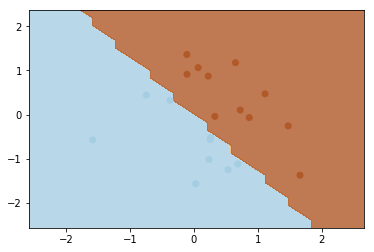

In [4]:
example(20, 2, 30)